# Теория вероятностей и математическая статистика. Geekbrains

## Урок 5

## Проверка статистических гипотез. P-значения. Доверительные интервалы

### Домашнее задание
### Казанцев Виталий


__Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания $\mu$ с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.


In [1]:
import numpy as np
from scipy import stats

In [2]:
std = 16    # Среднее квадратичное отклонение
n = 256     # объем выборки
p = 0.95    # надежность 
mean_ = 80    # Выборочное среднее


In [3]:
alpha = 1 - p    # Уровень надежности

t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)    # квантили при двусторонней критической области

t1, t2

(-1.959963984540054, 1.959963984540054)

In [4]:
interval = (mean_ + t2 * std / np.sqrt(n)) - (mean_ + t1 * std / np.sqrt(n))
print(f'Ответ:\nШирина доверительного инеравала равна {interval}')

Ответ:
Ширина доверительного инеравала равна 3.9199279690801063


__Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.




In [5]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
stats.ttest_1samp(samples, popmean=200)

Ttest_1sampResult(statistic=-1.0651074037450896, pvalue=0.31456660352472854)

__Ответ__: P = 0.3145666, значение P больше заданного уровня значчимости, значит гипотезу о том, что вес пачки печенья равен 200 грамм можно принять.

__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

В качестве ответа запишите 1, если нулевая гипотеза верна, и 0 иначе.

__Ответ__: 1

In [6]:
samples2 = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02])

In [7]:
n = samples2.shape[0]    # объем выборки
n

24

In [8]:
alpha = 0.05    # уровень значимости
df = n - 1
t1 = stats.chi2.ppf(alpha / 2, df)
t2 = stats.chi2.ppf( 1 - alpha / 2, df)

t1, t2    # квантили

(11.688551922452438, 38.0756272503558)

In [9]:
sample_variance = samples2.std(ddof=1)**2    # оценка дисперсии
sample_variance

0.07804495041666669

In [10]:
variance = 0.0625

In [11]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

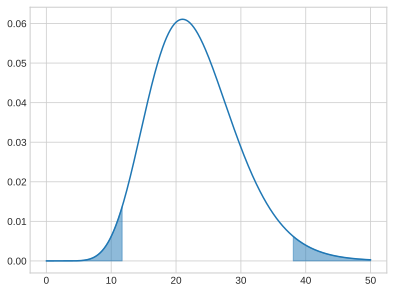

In [12]:
ox = np.linspace(0, 50, 500)
oy = stats.chi2.pdf(ox, df)

ox_left = np.linspace(0, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df)

ox_right = np.linspace(t2, 50, 100)
oy_right = stats.chi2.pdf(ox_right, df)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

plt.show()

In [13]:
# Проверяем гипотезу
H = (n - 1) * sample_variance / variance
H

28.720541753333343

### Ответ:
Значение статистики не попало в критическую область, значит гипотеза о значении дисперсии 0.0625 верна